In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
date_begin = "2018-05-14"
date_end = "2018-05-29"

In [3]:
bike_data = pd.read_csv("dados_bike_cet.csv", parse_dates=["date", "timestamp"])
inds = (bike_data.local == "Faria Lima")
inds &= (bike_data.date > date_begin)
inds &= (bike_data.date < date_end)
bike_data = bike_data[inds]
bike_data = bike_data.drop(["timestamp", "id", "name", "sens","local"], axis=1)

In [4]:
hourly_bike_data = bike_data.resample("1h", on="date").comptage.sum().reset_index().set_index("date")

In [5]:
air_data = pd.read_csv("27.csv.gz", compression="gzip", na_values=["--"], parse_dates=["time"])
inds = (air_data.time > date_begin)
inds &= (air_data.time < date_end)
air_data = air_data[inds].set_index("time")

In [6]:
air_data = air_data.drop(["index", "id"], axis=1)

In [7]:
merged_data = hourly_bike_data.join(air_data)

In [8]:
merged_data.columns

Index(['comptage', 'BENZENO', 'CO', 'MP10', 'MP2.5', 'NO2', 'O3', 'TOLUENO'], dtype='object')

In [9]:
x_greve = "2018-05-21 12:00"
x_caos = "2018-05-24 12:00"

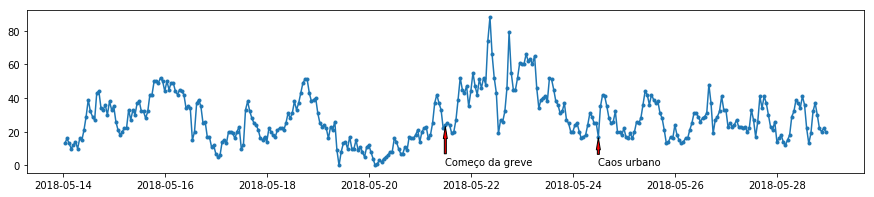

In [10]:
col1 = "comptage"
col2 = "MP10"

inds = merged_data[col2] == merged_data[col2]
#inds = ~pd.isnull(merged_data[col1])
inds &= ~pd.isnull(merged_data[col2])
data = merged_data[inds].copy()

#x = data[col1]
y = data[col2]
plt.figure(figsize=(15, 3))
plt.plot(y, '.-')
plt.annotate("Começo da greve", xy=(x_greve, y[x_greve]), xytext=(x_greve, 0),
            arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=4))
plt.annotate("Caos urbano", xy=(x_caos, y[x_caos]), xytext=(x_caos, 0),
            arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=4))
plt.show()

NameError: name 'resampled_data' is not defined

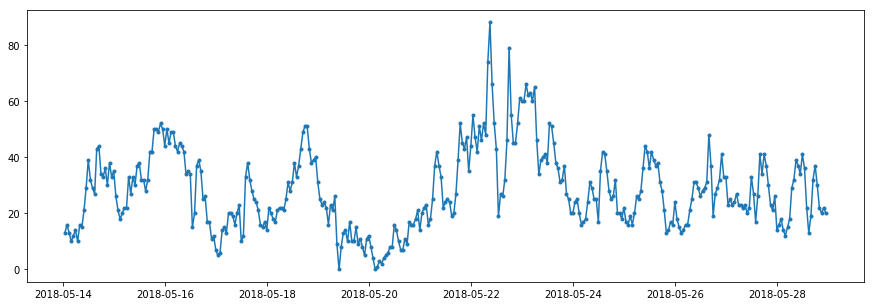

In [11]:

plt.figure(figsize=(15, 5))


plt.plot(y, '.-', label="")
plt.plot(resampled_data[inds2], 'o', label="Domingos")

plt.annotate("Greve", xy=("2018-05-21", resampled_data["2018-05-21"]), 
             arrowprops=dict(facecolor='blue', shrink=0.05, width=1, headwidth=2),
            xytext=("2018-05-21", 1000))

plt.annotate("Caos", xy=("2018-05-24", resampled_data["2018-05-24"]), 
             arrowprops=dict(facecolor='red', shrink=0.05, width=1, headwidth=2),
            xytext=("2018-05-24", 2000))

plt.axhline(np.mean(resampled_data["2018-05-22":]), color="C3", label="Média após greve", alpha=0.5)
plt.axhline(np.mean(resampled_data), color="C2", label="Média desde março", alpha=0.5)

plt.title("Contagem acumulada diária na Faria Lima")
plt.xlabel("Data")
plt.ylabel("Contagem acumulada diária")

plt.legend()
plt.show()